In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Get rid of warning
import warnings
warnings.simplefilter("ignore")
pd.options.mode.chained_assignment = None  

## Task 1 Classification on the ‘credit-g’ dataset

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
data = fetch_openml('credit-g')

In [4]:
column_names = ['checking_status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_status', 'employment', 'installment_commitment', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker']

X = pd.DataFrame(data['data'], columns = column_names)  # Features
y = pd.DataFrame(data['target'], columns = ['target'])  # Target

### 1.1 Determine which features are continuous and which are categorical.

Continuous features include 3 variables, which are duration, credit_amount and age.

Categorical features include 17 variables, which are checking_status, credit_history, purpose, savings_status, employment, installment_commitment, personal_status, other_parties, residence_since, property_magnitude, other_payment_plans, housing, existing_credits, job,  num_dependents, own_telephone, foreign_worker.

### 1.2 Visualize the univariate distribution of each continuous feature, and the distribution of the target.

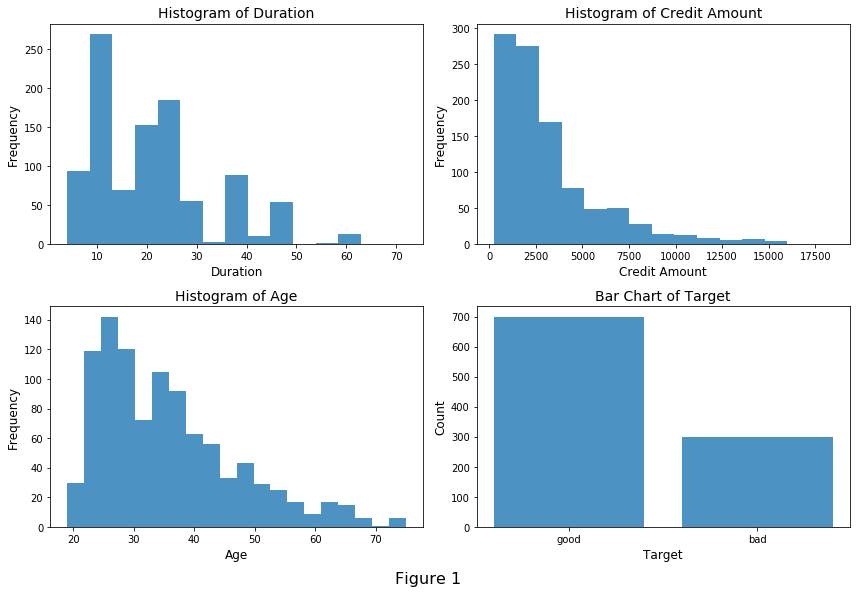

In [5]:
y_count = y['target'].value_counts()

fig, ax = plt.subplots(2, 2, figsize = (12, 8))
ax[0, 0].hist(X['duration'], bins = 15, alpha = 0.8)
ax[0, 1].hist(X['credit_amount'], bins = 15, alpha = 0.8)
ax[1, 0].hist(X['age'], bins = 20, alpha = 0.8)
ax[1, 1].bar(y_count.index, y_count.values, alpha = 0.8)

ax[0, 0].set_title('Histogram of Duration', fontsize = 14)
ax[0, 1].set_title('Histogram of Credit Amount', fontsize = 14)
ax[1, 0].set_title('Histogram of Age', fontsize = 14)
ax[1, 1].set_title('Bar Chart of Target', fontsize = 14)

ax[0, 0].set_xlabel('Duration', fontsize = 12)
ax[0, 1].set_xlabel('Credit Amount', fontsize = 12)
ax[1, 0].set_xlabel('Age', fontsize = 12)
ax[1, 1].set_xlabel('Target', fontsize = 12)

ax[0, 0].set_ylabel('Frequency', fontsize = 12)
ax[0, 1].set_ylabel('Frequency', fontsize = 12)
ax[1, 0].set_ylabel('Frequency', fontsize = 12)
ax[1, 1].set_ylabel('Count', fontsize = 12)

fig.suptitle(t = 'Figure 1', y = 0, fontsize = 16)
plt.tight_layout()

### 1.3 Split data into training and test set. Do not use the test set until a final evaluation in 1.5. Preprocess the data (such as treatment of categorical variables) without using a pipeline and evaluate an initial LogisticRegression model with an training/validation split.

In [6]:
from sklearn.model_selection import train_test_split

#### (1) Split data into training set and test set.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)  # Set randome_state to be 123. 

#### (2) Data Preprocessing

In [8]:
# One-Hot Encoding (get_dummies())
X_train_dummies = pd.get_dummies(X_train, columns=['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'installment_commitment', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker'])
X_test_dummies = pd.get_dummies(X_test, columns=['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'installment_commitment', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker'])

#### (3) Split the preprocessed training set into training set and validation set.

In [9]:
X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train_dummies, y_train, random_state = 123)  # Set random_state = 123

#### (4) Train an initial LogisticRegression model on training set and evaluate it on validation set.

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_train, y_train_train['target'])
print(lr.score(X_train_val, y_train_val['target']))

0.75


### 1.4 Use ColumnTransformer and pipeline to encode categorical variables (your choice of OneHotEncoder or another one from the categorical_encoder package, or both). Evaluate Logistic Regression, Linear Support Vector Machines and nearest neighbors using cross-validation. How different are the results? How does scaling the continuous features with StandardScaler influence the results?

#### (1) Use ColumnTransformer and pipeline to encode categorical variables and leave continuous variables unscaled. Evaluate Logistic Regression, Linear Support Vector Machines and Nearest Neighbors using cross-validation. 

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

# Specify the categorical and continuous features
categorical = [0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19]
continuous = [1, 4, 12]

# Create column_transformer
column_transformer = ColumnTransformer([('OneHotEncoder', OneHotEncoder(), 
                                         categorical)], 
                                        remainder = 'passthrough')
# Create pipeline
pipeline_lr = Pipeline([('column_transformer', column_transformer), 
                        ('model', LogisticRegression())])
pipeline_lsvm = Pipeline([('column_transformer', column_transformer), 
                          ('model', LinearSVC())])
pipeline_nn = Pipeline([('column_transformer', column_transformer), 
                        ('model', KNeighborsClassifier())])

# Use cross_validation to train and evaluate the three models separately.
lr_mean_score = np.mean(cross_val_score(pipeline_lr, X_train, y_train['target'], cv = 5))  
lsvm_mean_score = np.mean(cross_val_score(pipeline_lsvm, X_train, y_train['target'], cv = 5))  
nn_mean_score = np.mean(cross_val_score(pipeline_nn, X_train, y_train['target'], cv = 5))

print('The mean test score of lr is:', lr_mean_score, '\nThe mean test score of lsvm is:', lsvm_mean_score, '\nThe mean test score of nn is:', nn_mean_score)

The mean test score of lr is: 0.756 
The mean test score of lsvm is: 0.6453333333333333 
The mean test score of nn is: 0.6479999999999999


The mean test scores of Logistic Regression, Linear Support Vector Machines and Nearest Neighbors show that Logistic Regression is the best model among these three models, with a score of 0.7560. Also, the score of the Logistic Regression model trained using ColumnTransformer and Pipeline is roughly equal to the score of the Logistic Regression model trained without using these methods.

#### (2) Use ColumnTransformer and pipeline to encode categorical variables and scale continuous variables using StandardScaler. Evaluate Logistic Regression, Linear Support Vector Machines and Nearest Neighbors using cross-validation. 

In [12]:
# Create column_transformer
column_transformer_2 = ColumnTransformer([('OneHotEncoder', OneHotEncoder(), 
                                           categorical), 
                                          ('Scaler', StandardScaler(), 
                                           continuous)])
# Create pipeline
pipeline_lr_2 = Pipeline([('column_transformer', column_transformer_2), 
                          ('model', LogisticRegression())])
pipeline_lsvm_2 = Pipeline([('column_transformer', column_transformer_2), 
                            ('model', LinearSVC())])
pipeline_nn_2 = Pipeline([('column_transformer', column_transformer_2), 
                          ('model', KNeighborsClassifier())])

# Use cross_validation to train and evaluate the three models separately.
lr_mean_score_2 = np.mean(cross_val_score(pipeline_lr_2, X_train, y_train['target'], cv = 5))
lsvm_mean_score_2 = np.mean(cross_val_score(pipeline_lsvm_2, X_train, y_train['target'], cv = 5))
nn_mean_score_2 = np.mean(cross_val_score(pipeline_nn_2, X_train, y_train['target'], cv = 5))

print('The mean test score of lr:', lr_mean_score_2, '\nThe mean test score of lsvm:', lsvm_mean_score_2, '\nThe mean test score of knn:', nn_mean_score_2)

The mean test score of lr: 0.7493333333333334 
The mean test score of lsvm: 0.744 
The mean test score of knn: 0.7333333333333333


If we scale the continuous features with StandardScaler, the best model is still Logistic Regression. But its mean test score becomes 0.7493. The mean test score of Nearest Neighbors increases a lot, from 0.6480 to 0.7333. The mean test score of Linear Support Vector Machines increases from 0.6053 to 0.7440. 

### 1.5 Tune the parameters using GridSearchCV. Do the results improve? Evaluate only the best model on the test set. Visualize the performance as function of the parameters for all three models.

#### (1) Tune the parameters using GridSearchCV
We still use ColumnTransformer and pipeline. Encode categorical variables using OneHotEncoder and scale continuous variables using StandardScaler. 

In [13]:
# Create pipeline
pipeline_3 = Pipeline([('column_transformer', column_transformer_2), 
                       ('model', LogisticRegression())])
# Set grid parameters
param_grid_3 = [{'model': [LogisticRegression()], 
                 'model__C': [0.001, 0.005, 0.01, 
                              0.05, 0.1, 0.5, 1],
                 'column_transformer': [column_transformer_2]},
                {'model': [LinearSVC()],
                 'model__C': [0.001, 0.005, 0.01, 
                              0.05, 0.1, 0.5, 1],
                 'column_transformer': [column_transformer_2]},
                {'model': [KNeighborsClassifier()],
                 'model__n_neighbors': np.arange(1, 50, 5),
                 'column_transformer': [column_transformer_2]}]

# Do GridSearchCV
grid = GridSearchCV(pipeline_3, param_grid_3, cv = 5)
grid.fit(X_train, y_train['target'])

# Save the results into a dataframe
results_3 = pd.DataFrame(grid.cv_results_)  # Store the results in the form of dataframe.

# Transform the mean test score of each of the three models with different parameter settings into numpy array.
LR_result = np.array(results_3.iloc[0:7, 14])
LSVM_result = np.array(results_3.iloc[7:14, 14])
KNN_result = np.array(results_3.iloc[14:, 14])

print('The mean test score of the best model of ls:', np.max(LR_result), '\nThe mean test score of best model of lsvm:', np.max(LSVM_result), '\nThe mean test score of best model of knn:', np.max(KNN_result))

The mean test score of the best model of ls: 0.7653333333333332 
The mean test score of best model of lsvm: 0.7626666666666667 
The mean test score of best model of knn: 0.7493333333333332


#### (2) Do the results improve? 
By using GridSearchCV to tune the hyperparameters, we can get the best model for each of the three models. The max mean test scores of Logistic Regression, Linear Support Vector Machine and Nearest Neighbors are 0.7653, 0.7627 and 0.7493, respectively. All of them improve a little than without tuning the hyperparameters.

#### (3) Evaluate only the best model on the test set.

We can use grid directly without retrain the model because GridSearchCV has done this for us.

In [14]:
grid.score(X_test, y_test['target'])

0.744

The test score of the best model, which is Logistic Regression with regularization parameter C 0.1, is 0.744.

#### (4) Visualize the performance as function of the parameters for all three models

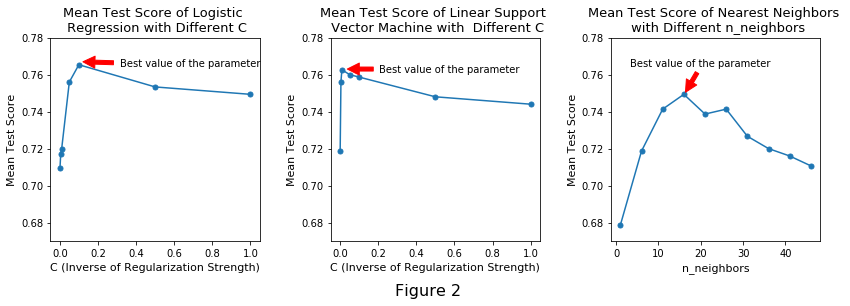

In [15]:
# Create a 1x3 figure
fig2, ax2 = plt.subplots(1, 3, figsize = (12, 4))
ax2[0].plot([0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], 
            LR_result, 
            marker = 'o', markersize = 5)
ax2[1].plot([0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], 
            LSVM_result, 
            marker = 'o', markersize = 5)
ax2[2].plot(np.arange(1, 50, 5), 
            KNN_result, 
            marker = 'o', markersize = 5)

# Mark the point with the largest mean test score
ax2[0].annotate('Best value of the parameter',
            xy=(0.1, 0.767), xycoords='data',
            xytext=(1, 0.9), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.1),
            horizontalalignment='right', 
            verticalalignment='top')
ax2[1].annotate('Best value of the parameter',
            xy=(0.02, 0.763), xycoords='data',
            xytext=(0.9, 0.87), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.1),
            horizontalalignment='right', 
            verticalalignment='top')
ax2[2].annotate('Best value of the parameter',
            xy=(16, 0.749), xycoords='data',
            xytext=(0.76, 0.9), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.1),
            horizontalalignment='right', 
            verticalalignment='top')

# Set the attributes of plots
ax2[0].set_ylim(0.67, 0.78)
ax2[1].set_ylim(0.67, 0.78)
ax2[2].set_ylim(0.67, 0.78)

ax2[0].set_xlabel('C (Inverse of Regularization Strength)', 
                  fontsize = 11)
ax2[1].set_xlabel('C (Inverse of Regularization Strength)', 
                  fontsize = 11)
ax2[2].set_xlabel('n_neighbors', fontsize = 11)

ax2[0].set_ylabel('Mean Test Score', fontsize = 11)
ax2[1].set_ylabel('Mean Test Score', fontsize = 11)
ax2[2].set_ylabel('Mean Test Score', fontsize = 11)

ax2[0].set_title('Mean Test Score of Logistic \n Regression with Different C', fontsize = 13)
ax2[1].set_title('Mean Test Score of Linear Support \n Vector Machine with  Different C', fontsize = 13)
ax2[2].set_title('Mean Test Score of Nearest Neighbors \n with Different n_neighbors', fontsize = 13)

fig2.suptitle(t = 'Figure 2', y = 0, fontsize = 16)
plt.tight_layout()

Figure 2 shows that, with the increase of the parameter, the mean test score of each model have the same trend roughly. At the beginning, it increases with the increase of the parameter and at some point, it goes down. So we can easily figure out the value of the parameter with which the model has the highest mean test value.

The best parameter of Logistic Rgression: 0.1;

The best parameter of Linear Support Vector Machine: 0.01;

The best parameter of Nearest Neighbors: 16;

### 1.6 Change the cross-validation strategy from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters that are found change? Do they change if you change the random seed of the shuffling? Or if you change the random state of the split into training and test data?

#### (1) Change the cross-validation strategy from ‘stratified k-fold’ to ‘kfold’ with shuffling.

We still use ColumnTransformer and pipeline. Encode categorical variables using OneHotEncoder and scale continuous variables using StandardScaler.

Notice that the default strategy of cross_val_score is 'stratified k-fold'. So next I will use 'kfold' with shuffling as the cross-validation strategy and compare the results with the results in (1.5).

In [16]:
from sklearn.model_selection import KFold

# Create a cross-validation object (KFold)
kf = KFold(n_splits = 5, shuffle = True)

# Do GridSearchCV
grid_1 = GridSearchCV(pipeline_3, param_grid_3, cv = kf)
grid_1.fit(X_train, y_train['target'])

# Save the results into a dataframe
results_4 = pd.DataFrame(grid_1.cv_results_)  # Store the results in the form of dataframe.

# Transform the mean test score of each of the three models with different parameter settings into numpy array.
LR_result_1 = np.array(results_4.iloc[0:7, 14])
LSVM_result_1 = np.array(results_4.iloc[7:14, 14])
KNN_result_1 = np.array(results_4.iloc[14:, 14])

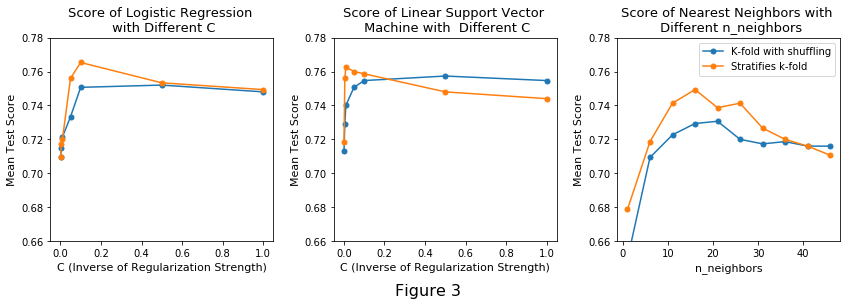

In [17]:
# Create a 1x3 figure
fig3, ax3 = plt.subplots(1, 3, figsize = (12, 4))
ax3[0].plot([0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1],
            LR_result_1, marker = 'o', markersize = 5,
            label = 'K-fold with shuffling')
ax3[1].plot([0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], 
            LSVM_result_1, marker = 'o', markersize = 5,
            label = 'K-fold with shuffling')
ax3[2].plot(np.arange(1, 50, 5), 
            KNN_result_1, marker = 'o', markersize = 5,
            label = 'K-fold with shuffling')
ax3[0].plot([0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], 
            LR_result, marker = 'o', markersize = 5,
            label = 'Stratifies k-fold')
ax3[1].plot([0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], 
            LSVM_result, marker = 'o', markersize = 5,
            label = 'Stratifies k-fold')
ax3[2].plot(np.arange(1, 50, 5), 
            KNN_result, marker = 'o', markersize = 5,
            label = 'Stratifies k-fold')

# Set the attributes of plots
ax3[0].set_ylim(0.66, 0.78)
ax3[1].set_ylim(0.66, 0.78)
ax3[2].set_ylim(0.66, 0.78)

ax3[0].set_xlabel('C (Inverse of Regularization Strength)', 
                  fontsize = 11)
ax3[1].set_xlabel('C (Inverse of Regularization Strength)', 
                  fontsize = 11)
ax3[2].set_xlabel('n_neighbors', fontsize = 11)

ax3[0].set_ylabel('Mean Test Score', fontsize = 11)
ax3[1].set_ylabel('Mean Test Score', fontsize = 11)
ax3[2].set_ylabel('Mean Test Score', fontsize = 11)

ax3[0].set_title('Score of Logistic Regression \n with Different C', fontsize = 13)
ax3[1].set_title('Score of Linear Support Vector \n Machine with  Different C', fontsize = 13)
ax3[2].set_title('Score of Nearest Neighbors with \n Different n_neighbors', fontsize = 13)

fig3.suptitle(t = 'Figure 3', y = 0, fontsize = 16)
plt.legend()
plt.tight_layout()

Figure 3 indicates that the parameters that are found will change if we change the cross-validation strategy from ‘stratified k-fold’ to ‘k-fold’ with shuffling.

#### (2) Change the random seed of the shuffling

In [18]:
from sklearn.model_selection import KFold

# Create a cross-validation object (KFold)
kf_0 = KFold(n_splits = 5, shuffle = True, random_state = 0)  # Set the random seed of the shuffling to be 0
kf_100 = KFold(n_splits = 5, shuffle = True, random_state = 100)  # Set the random seed of the shuffling to be 100

# Do GridSearchCV
grid_0 = GridSearchCV(pipeline_3, param_grid_3, cv = kf_0)
grid_0.fit(X_train, y_train['target'])

grid_100 = GridSearchCV(pipeline_3, param_grid_3, cv = kf_100)
grid_100.fit(X_train, y_train['target'])

# Save the results into a dataframe
results_5 = pd.DataFrame(grid_0.cv_results_)  # Store the results in the form of dataframe.
results_6 = pd.DataFrame(grid_100.cv_results_)

# Transform the mean test score of each of the three models with different parameter settings into numpy array.
LR_result_2 = np.array(results_5.iloc[0:7, 14])
LSVM_result_2 = np.array(results_5.iloc[7:14, 14])
KNN_result_2 = np.array(results_5.iloc[14:, 14])

LR_result_3 = np.array(results_6.iloc[0:7, 14])
LSVM_result_3 = np.array(results_6.iloc[7:14, 14])
KNN_result_3 = np.array(results_6.iloc[14:, 14])

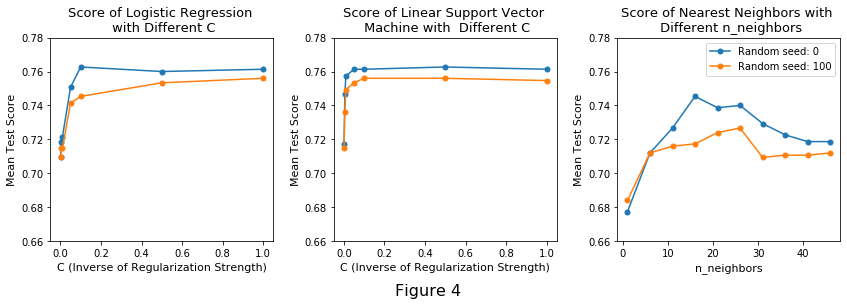

In [19]:
# Create a 1x3 figure
fig4, ax4 = plt.subplots(1, 3, figsize = (12, 4))
ax4[0].plot([0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], 
            LR_result_2, marker = 'o', markersize = 5,
            label = 'Random seed: 0')
ax4[1].plot([0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], 
            LSVM_result_2, marker = 'o', markersize = 5,
            label = 'Random seed: 0')
ax4[2].plot(np.arange(1, 50, 5), 
            KNN_result_2, marker = 'o', markersize = 5,
            label = 'Random seed: 0')
ax4[0].plot([0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], 
            LR_result_3, marker = 'o', markersize = 5,
            label = 'Random seed: 100')
ax4[1].plot([0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], 
            LSVM_result_3, marker = 'o', markersize = 5,
            label = 'Random seed: 100')
ax4[2].plot(np.arange(1, 50, 5), 
            KNN_result_3, marker = 'o', markersize = 5,
            label = 'Random seed: 100')

# Set the attributes of plots
ax4[0].set_ylim(0.66, 0.78)
ax4[1].set_ylim(0.66, 0.78)
ax4[2].set_ylim(0.66, 0.78)

ax4[0].set_xlabel('C (Inverse of Regularization Strength)', 
                  fontsize = 11)
ax4[1].set_xlabel('C (Inverse of Regularization Strength)', 
                  fontsize = 11)
ax4[2].set_xlabel('n_neighbors', fontsize = 11)

ax4[0].set_ylabel('Mean Test Score', fontsize = 11)
ax4[1].set_ylabel('Mean Test Score', fontsize = 11)
ax4[2].set_ylabel('Mean Test Score', fontsize = 11)

ax4[0].set_title('Score of Logistic Regression \n with Different C', fontsize = 13)
ax4[1].set_title('Score of Linear Support Vector \n Machine with  Different C', fontsize = 13)
ax4[2].set_title('Score of Nearest Neighbors with \n Different n_neighbors', fontsize = 13)

fig4.suptitle(t = 'Figure 4', y = 0, fontsize = 16)

plt.legend()
plt.tight_layout()

Figure 4 shows that, the parameters that are found will change if I change the random seed of the shuffling.

#### (3) Change the random state of the split into training and test data

In order to learn the influence of changing the random state of the split into training and test data, we need to control other aspects. So we still use cross-validation strategy 'stratified k-fold'. Then compare the results with the results in (1.5).

In [20]:
# Change the random seed of the split into training and test data from 123 to 1
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, random_state = 1) 

# Do GridSearchCV
grid_2 = GridSearchCV(pipeline_3, param_grid_3, cv = 5)
grid_2.fit(X_train_1, y_train_1['target'])

# Save the results into a dataframe
results_7 = pd.DataFrame(grid_2.cv_results_)  # Store the results in the form of dataframe.

# Transform the mean test score of each of the three models with different parameter settings into numpy array.
LR_result_4 = np.array(results_7.iloc[0:7, 14])
LSVM_result_4 = np.array(results_7.iloc[7:14, 14])
KNN_result_4 = np.array(results_7.iloc[14:, 14])

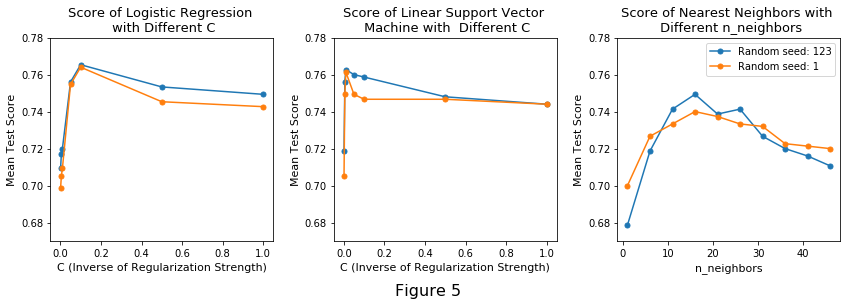

In [21]:
# Create a 1x3 figure
fig5, ax5 = plt.subplots(1, 3, figsize = (12, 4))
ax5[0].plot([0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], 
            LR_result, marker = 'o', markersize = 5,
            label = 'Random seed: 123')
ax5[1].plot([0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], 
            LSVM_result, marker = 'o', markersize = 5,
            label = 'Random seed: 123')
ax5[2].plot(np.arange(1, 50, 5), 
            KNN_result, marker = 'o', markersize = 5,
            label = 'Random seed: 123')
ax5[0].plot([0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], 
            LR_result_4, marker = 'o', markersize = 5,
            label = 'Random seed: 1')
ax5[1].plot([0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], 
            LSVM_result_4, marker = 'o', markersize = 5,
            label = 'Random seed: 1')
ax5[2].plot(np.arange(1, 50, 5), 
            KNN_result_4, marker = 'o', markersize = 5,
            label = 'Random seed: 1')

# Set the attributes of plots
ax5[0].set_ylim(0.67, 0.78)
ax5[1].set_ylim(0.67, 0.78)
ax5[2].set_ylim(0.67, 0.78)

ax5[0].set_xlabel('C (Inverse of Regularization Strength)', 
                  fontsize = 11)
ax5[1].set_xlabel('C (Inverse of Regularization Strength)', 
                  fontsize = 11)
ax5[2].set_xlabel('n_neighbors', fontsize = 11)

ax5[0].set_ylabel('Mean Test Score', fontsize = 11)
ax5[1].set_ylabel('Mean Test Score', fontsize = 11)
ax5[2].set_ylabel('Mean Test Score', fontsize = 11)

ax5[0].set_title('Score of Logistic Regression \n with Different C', fontsize = 13)
ax5[1].set_title('Score of Linear Support Vector \n Machine with  Different C', fontsize = 13)
ax5[2].set_title('Score of Nearest Neighbors with \n Different n_neighbors', fontsize = 13)

fig5.suptitle(t = 'Figure 5', y = 0, fontsize = 16)

plt.legend()
plt.tight_layout()

Figure 5 shows that, the parameters that are found will not change if I change the random seed of the shuffling and use 'stratified k-fold'.

### 1.7 Visualize the 20 most important coefficients for LogisticRegression and Linear Support Vector Machines using hyper-parameters that performed well in the grid-search.

As shown in Figure 2, the best parameters of C of Logistic Regression and Linear Support Vector Machines are 0.1 and 0.01, respectively. Other settings should be that 1) cross-validation strategy is 'stratified k-fold', 2) train_test_split randome_state is 123.

In [22]:
# Use the hyper-parameters that performed well in the grid-search when create the model
LR = LogisticRegression(C = 0.1)
LSVM = LinearSVC(C = 0.01)

# Train the two models on the preprocessed training data
LR.fit(X_train_dummies, y_train['target'])
LSVM.fit(X_train_dummies, y_train['target'])

# Get the coefficients of the two models
LR_coef = LR.coef_
LSVM_coef = LSVM.coef_

# Get the feature names
feature_names = X_train_dummies.columns

df_LR = pd.DataFrame({'feature_names': feature_names, 
                      'coef': LR_coef[0]})
df_LSVM = pd.DataFrame({'feature_names': feature_names, 
                        'coef': LSVM_coef[0]})

# Sort the coefficients according to their absolute values in a descending order
df_LR = df_LR.reindex(df_LR.coef.abs().sort_values(ascending = False).index)
df_LSVM = df_LSVM.reindex(df_LSVM.coef.abs().sort_values(ascending = False).index)

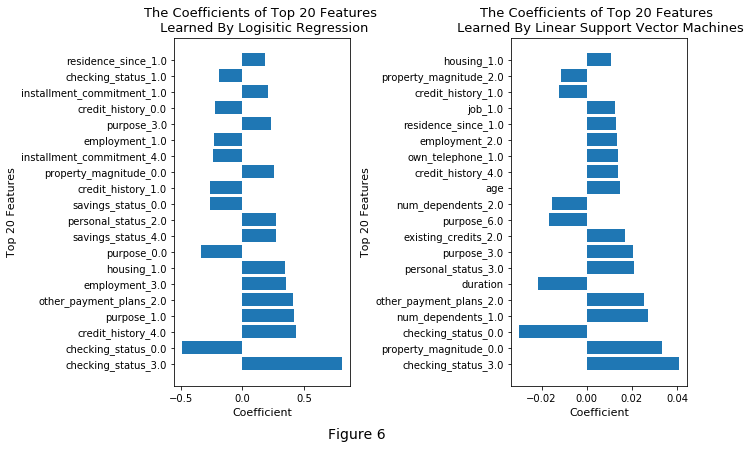

In [23]:
# Use horizontal bar chart to visualize the 20 most important coefficients for LR and LSVM
fig6, ax6 = plt.subplots(1, 2, figsize = (10, 6))
ax6[0].barh(df_LR.feature_names[0: 20], df_LR.coef[0: 20])
ax6[1].barh(df_LSVM.feature_names[0: 20], df_LSVM.coef[0: 20])

ax6[0].set_xlabel('Coefficient', fontsize = 11)
ax6[1].set_xlabel('Coefficient', fontsize = 11)

ax6[0].set_ylabel('Top 20 Features', fontsize = 11)
ax6[1].set_ylabel('Top 20 Features', fontsize = 11)

ax6[0].set_title('The Coefficients of Top 20 Features \n Learned By Logisitic Regression', fontsize = 13)
ax6[1].set_title('The Coefficients of Top 20 Features \n Learned By Linear Support Vector Machines', fontsize = 13)

fig6.suptitle(t = 'Figure 6', y = 0, fontsize = 14)

plt.tight_layout()